In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.cluster import hierarchy 
import scipy.cluster.hierarchy
from scipy.cluster.hierarchy import fcluster
from scipy.spatial import distance_matrix 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score
import pylab

In [2]:
source_df = pd.read_csv('../csvs/pima-indians-diabetes.csv', names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class'])
df = source_df.drop('Class', axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [3]:
x = df.values[:,:]
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx[:5]

array([[0.35294118, 0.74371859, 0.59016393, 0.35353535, 0.        ,
        0.50074516, 0.23441503, 0.48333333],
       [0.05882353, 0.42713568, 0.54098361, 0.29292929, 0.        ,
        0.39642325, 0.11656704, 0.16666667],
       [0.47058824, 0.91959799, 0.52459016, 0.        , 0.        ,
        0.34724292, 0.25362938, 0.18333333],
       [0.05882353, 0.44723618, 0.54098361, 0.23232323, 0.11111111,
        0.41877794, 0.03800171, 0.        ],
       [0.        , 0.68844221, 0.32786885, 0.35353535, 0.19858156,
        0.64232489, 0.94363792, 0.2       ]])

# Using SciPy

In [4]:
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

In [5]:
scores = []
methods = ['complete', 'single', 'average']

In [6]:
Z = hierarchy.linkage(D, 'complete')
max_clust = 2
clusters = fcluster(Z, max_clust, criterion='maxclust')
silhouette_avg = silhouette_score(D, clusters)
scores.append(silhouette_avg)
silhouette_avg

0.4048541865379711

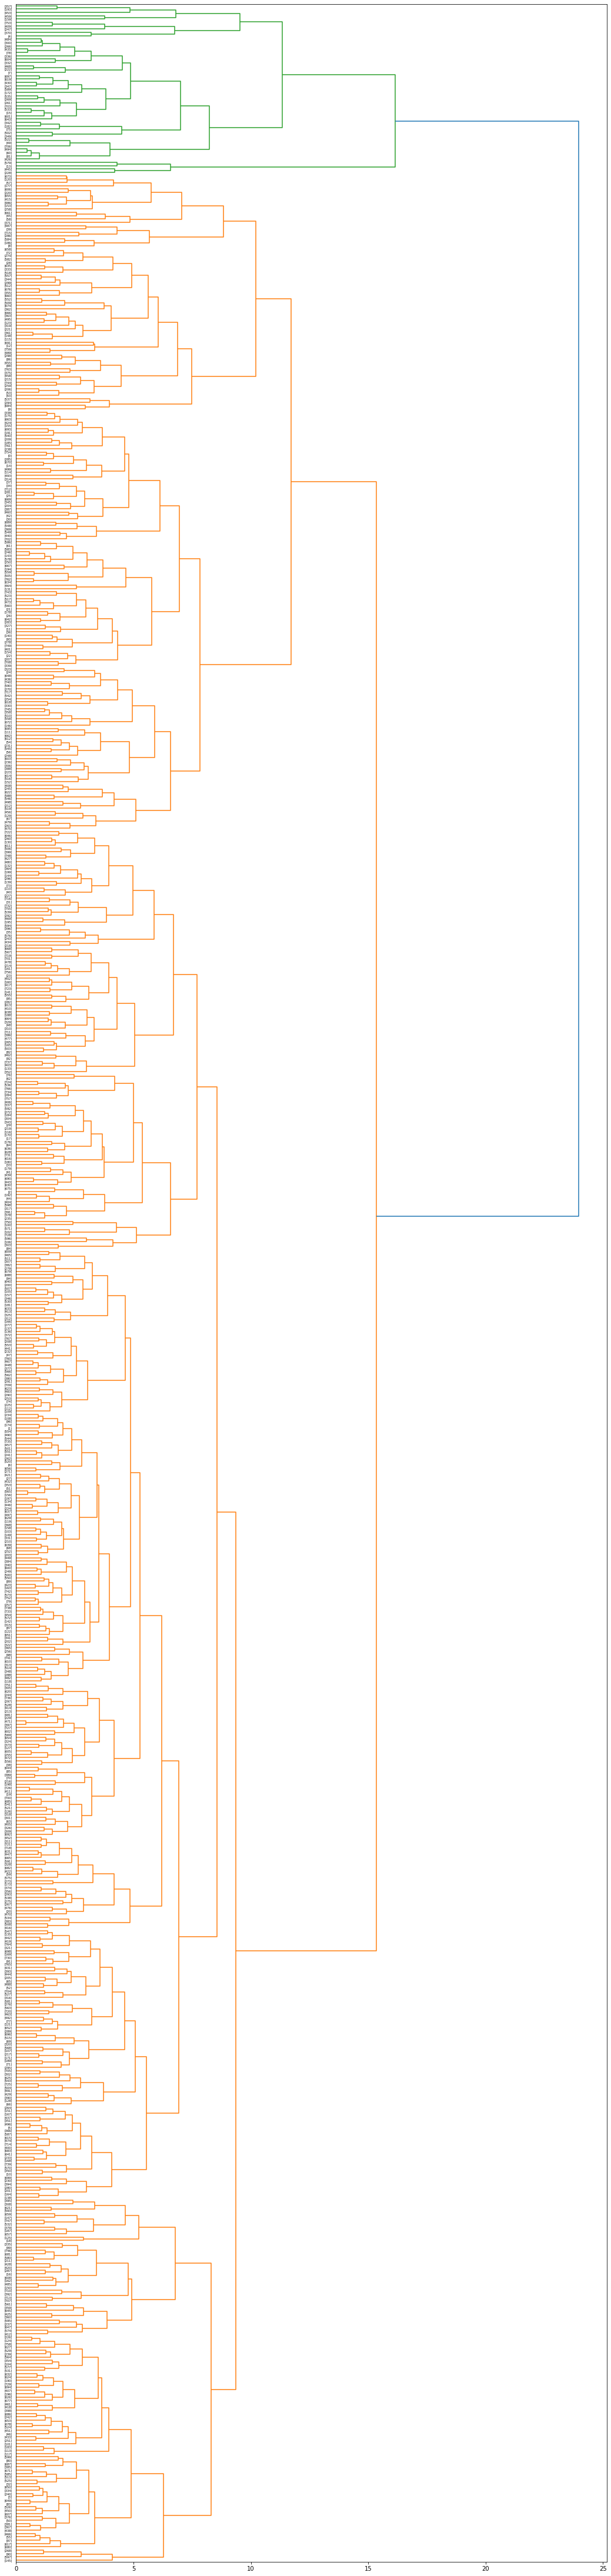

In [7]:
fig = pylab.figure(figsize=(18,80))
dendro = hierarchy.dendrogram(Z, leaf_label_func=(lambda id: '[%s]' %id), leaf_rotation=0,orientation = 'right')

In [8]:
source_df["SciPy_label"] = clusters
source_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,SciPy_label
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,2
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1
764,2,122,70,27,0,36.8,0.340,27,0,1
765,5,121,72,23,112,26.2,0.245,30,0,1
766,1,126,60,0,0,30.1,0.349,47,1,1


<AxesSubplot:>

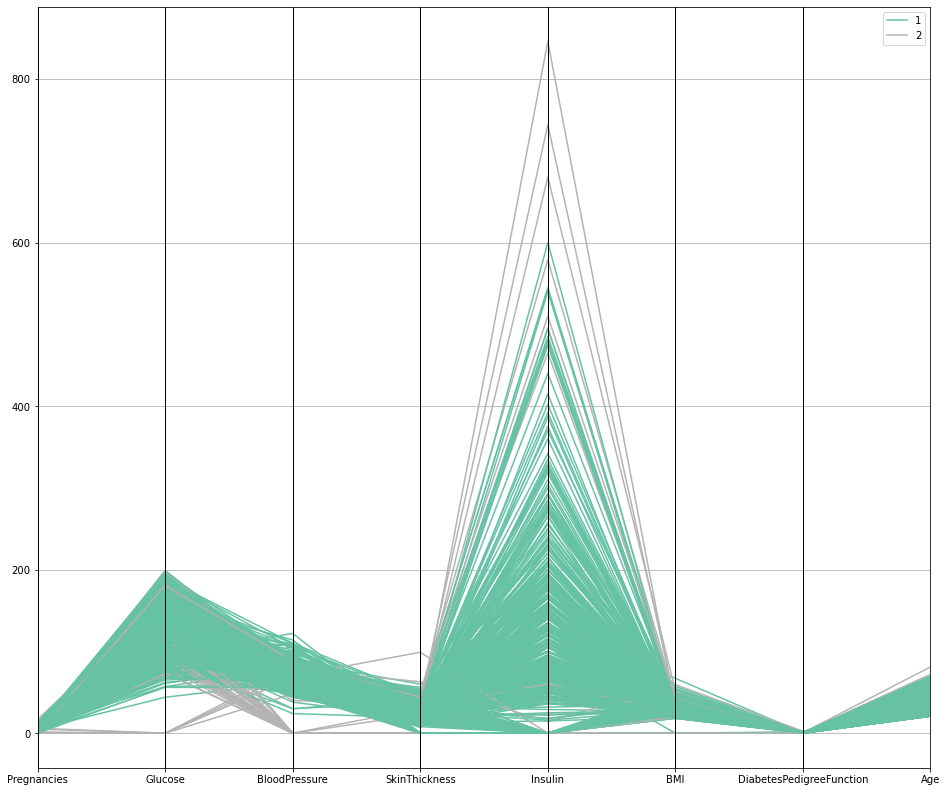

In [9]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

plt.figure(figsize=(16,14))
parallel_coordinates(source_df.drop('Class', axis=1), 'SciPy_label', colormap=plt.get_cmap("Set2"))

# Using SciKit

In [10]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.56380025 0.53665043 ... 0.45162548 0.50269284 0.62234648]
 [0.56380025 0.         0.7208524  ... 0.33774235 0.45222484 0.15595016]
 [0.53665043 0.7208524  0.         ... 0.4901339  0.58690672 0.72903545]
 ...
 [0.45162548 0.33774235 0.4901339  ... 0.         0.47201476 0.34337787]
 [0.50269284 0.45222484 0.58690672 ... 0.47201476 0.         0.5408326 ]
 [0.62234648 0.15595016 0.72903545 ... 0.34337787 0.5408326  0.        ]]


In [11]:
agglom = AgglomerativeClustering(n_clusters = 2, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [12]:
source_df["SciKit_label"] = agglom.labels_
source_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,SciPy_label,SciKit_label
0,6,148,72,35,0,33.6,0.627,50,1,1,0
1,1,85,66,29,0,26.6,0.351,31,0,1,0
2,8,183,64,0,0,23.3,0.672,32,1,1,0
3,1,89,66,23,94,28.1,0.167,21,0,1,0
4,0,137,40,35,168,43.1,2.288,33,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1,0
764,2,122,70,27,0,36.8,0.340,27,0,1,0
765,5,121,72,23,112,26.2,0.245,30,0,1,0
766,1,126,60,0,0,30.1,0.349,47,1,1,0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'DiabetesPedigreeFunction')

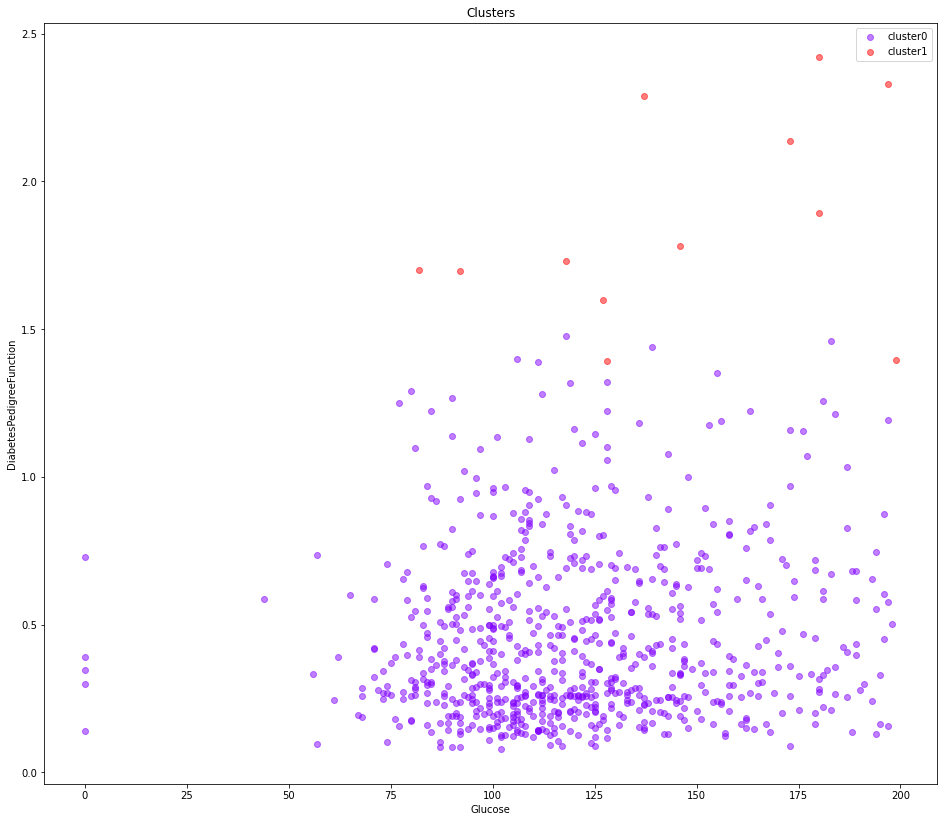

In [13]:
import matplotlib.cm as cm

n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = source_df[source_df.SciKit_label == label]
    plt.scatter(subset.Glucose, subset.DiabetesPedigreeFunction, c=color, label='cluster'+str(label),alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('Glucose')
plt.ylabel('DiabetesPedigreeFunction')

## using single

In [14]:
Z = hierarchy.linkage(D, 'single')
max_clust = 2
clusters = fcluster(Z, max_clust, criterion='maxclust')
silhouette_avg = silhouette_score(D, clusters)
scores.append(silhouette_avg)
silhouette_avg

0.5576726546670226

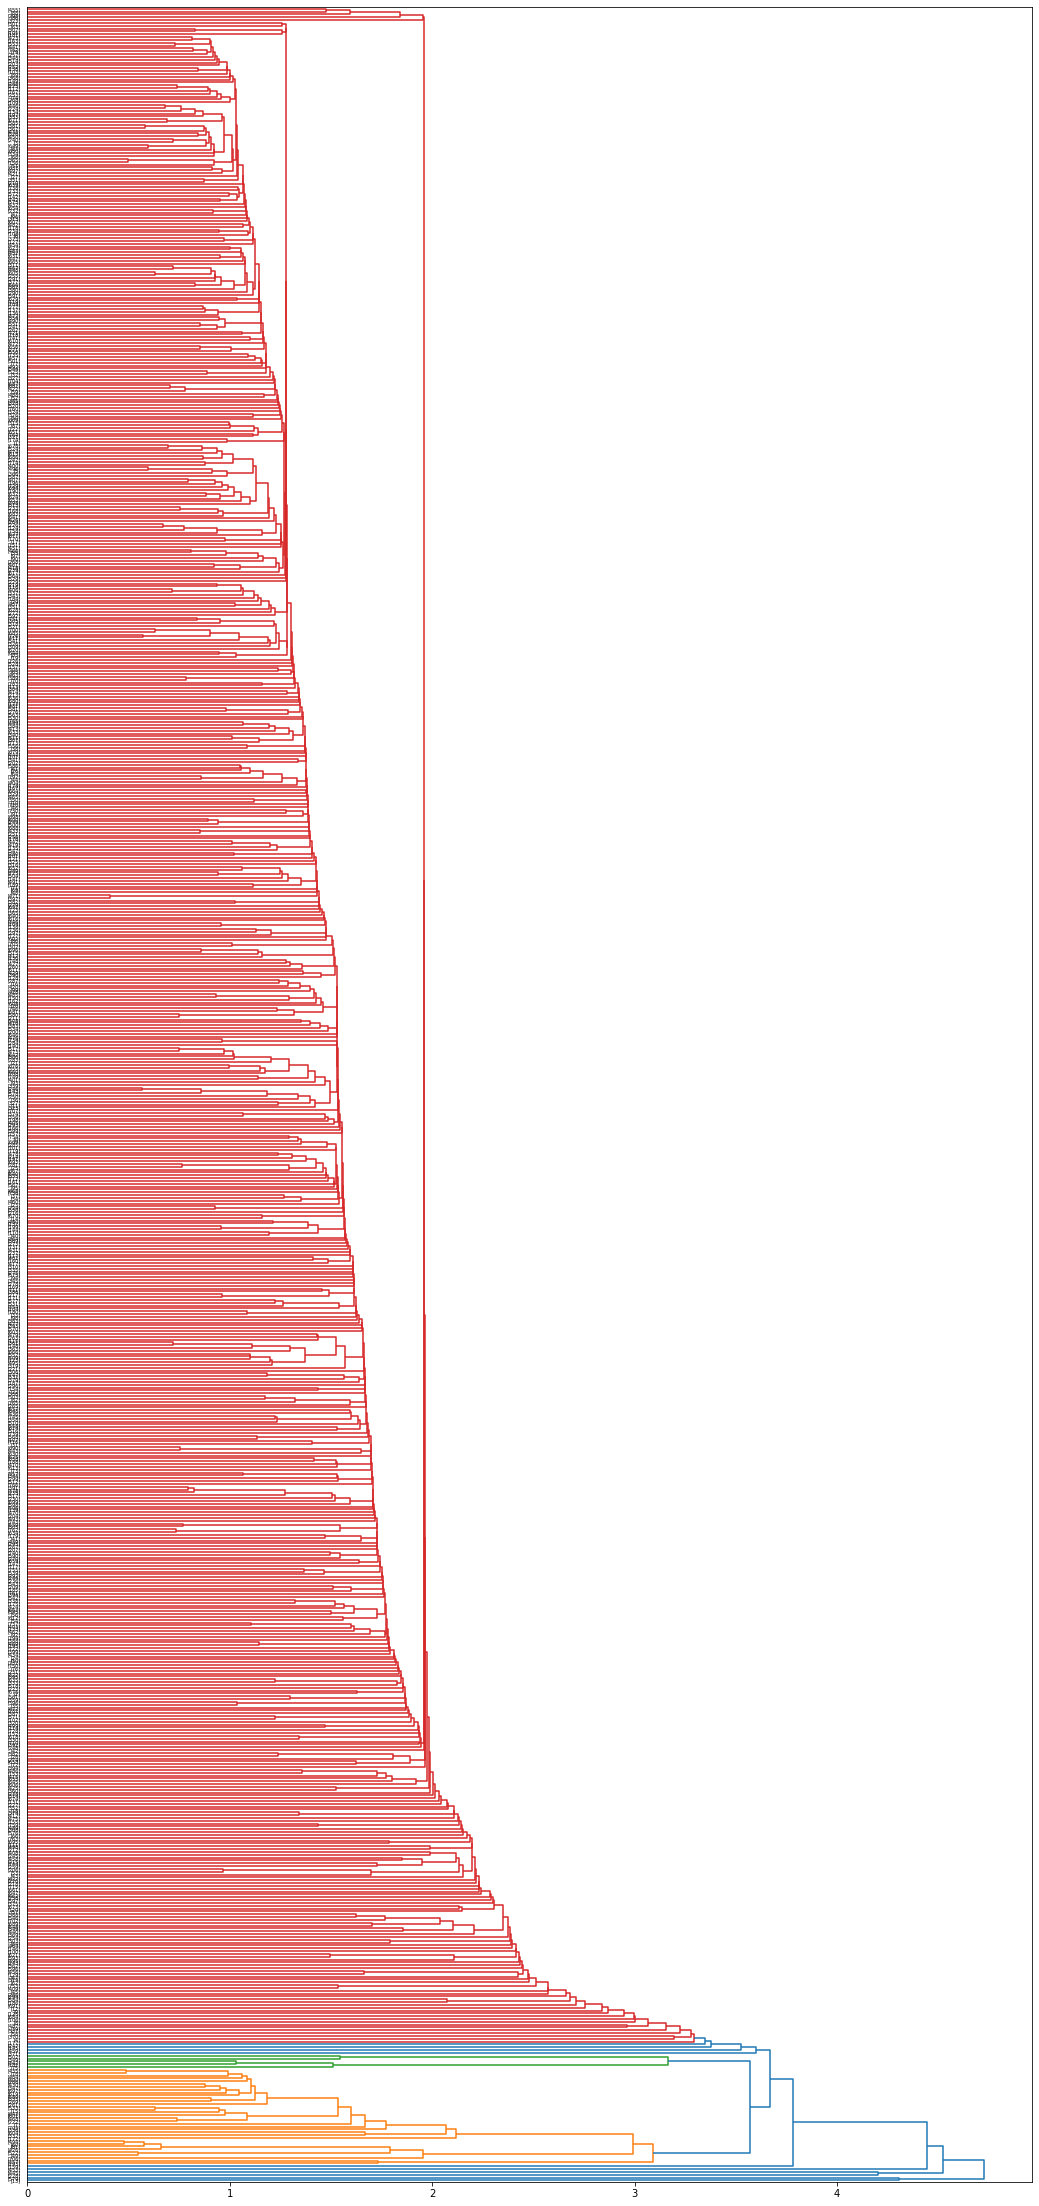

In [15]:
fig = pylab.figure(figsize=(18,40))
dendro = hierarchy.dendrogram(Z, leaf_label_func=(lambda id: '[%s]' %id), leaf_rotation=0,orientation = 'right')

## using average

In [16]:
Z = hierarchy.linkage(D, 'average')
max_clust = 2
clusters = fcluster(Z, max_clust, criterion='maxclust')
silhouette_avg = silhouette_score(D, clusters)
scores.append(silhouette_avg)
silhouette_avg

0.5534124028139674

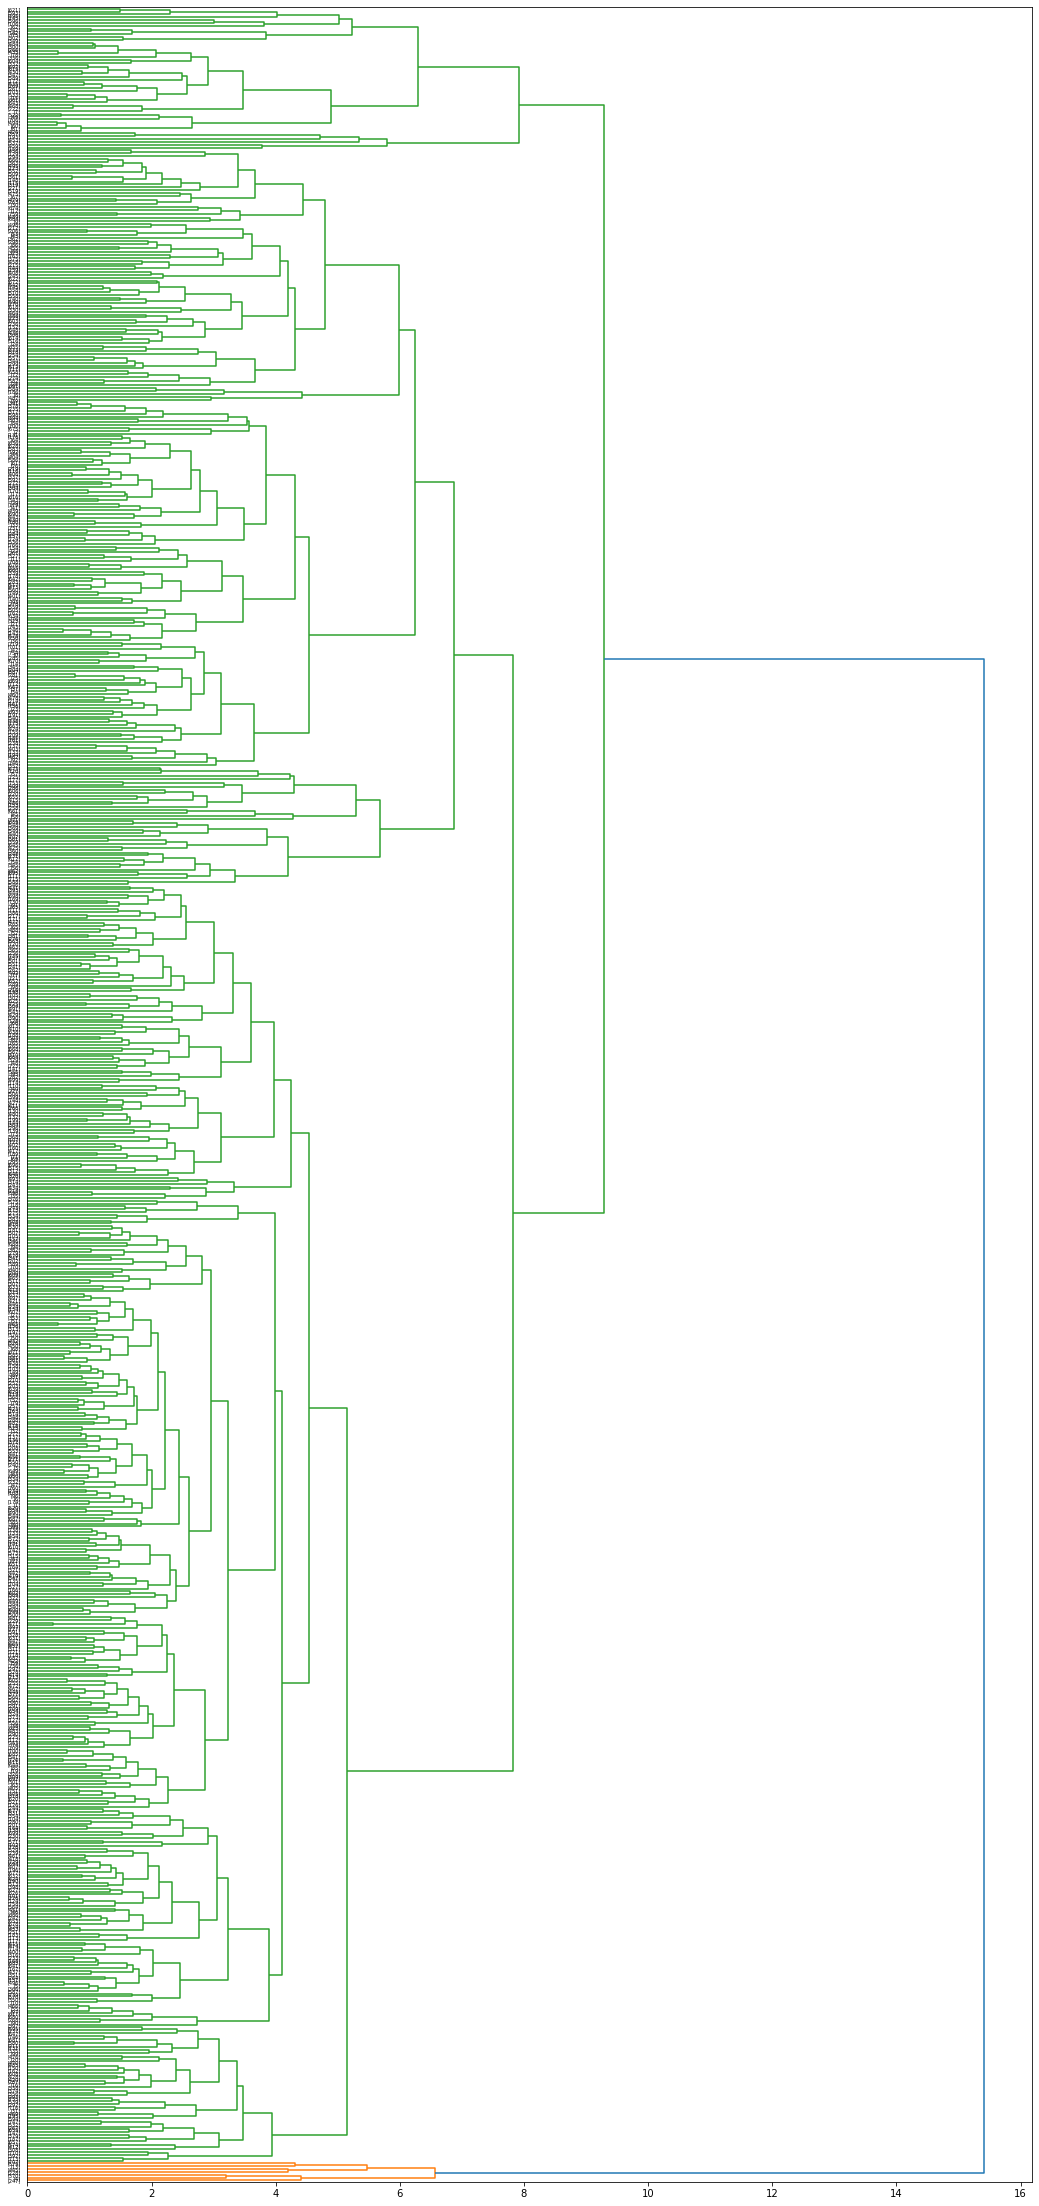

In [17]:
fig = pylab.figure(figsize=(18,40))
dendro = hierarchy.dendrogram(Z, leaf_label_func=(lambda id: '[%s]' %id), leaf_rotation=0,orientation = 'right')

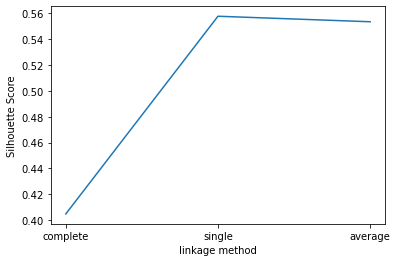

In [18]:
plt.plot(methods, scores)
plt.xlabel('linkage method')
plt.ylabel('Silhouette Score')
plt.show()

In [19]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object